In [75]:
%%time
import numpy as np
from random import randint
import random
import math
import pandas as pd
import pickle, os, math
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

Wall time: 0 ns


In [42]:
%%time
data_dir = os.path.join(os.curdir, 'Data', 'Score', '400000_68per', 'data_basic.pkl')
with open(data_dir, 'rb') as in_file:
    ot = pickle.load(in_file)
data_pics = ot['data']
target_pics = ot['target']
print(data_pics.shape)

X_train, X_test, y_train, y_test = train_test_split(
    data_pics, target_pics, test_size=0.1, random_state=randint(100, 10000))
print(X_train.shape)
X_train_train, X_vali, y_train_train, y_vali = train_test_split(
    X_train, y_train, test_size=0.3, random_state=randint(100, 10000))
print('class 0 has ' + str(len(y_train.index[y_train[0] == 0].tolist())) + ' points')
print('class 1 has ' + str(len(y_train.index[y_train[0] == 1].tolist())) + ' points')

index_0 = y_train.index[y_train[0] == 0].tolist()
index_1 = y_train.index[y_train[0] != 0].tolist()
index_0_comparable_to_1 = np.random.choice(index_0, math.floor(len(index_1) * 1))
samples = np.concatenate([index_1, index_0_comparable_to_1])
print(str(len(index_1)) + ' + ' + str(len(index_0_comparable_to_1)) + ' = ' + str(len(samples)))


small_data = data_pics.iloc[samples, :]
small_target = target_pics.iloc[samples, :]

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    small_data, small_target, test_size=0.3, random_state=randint(100, 10000))
X_train_train_small, X_vali_small, y_train_train_small, y_vali_small = train_test_split(
    X_train_small, y_train_small, test_size=0.3, random_state=randint(100, 10000))

y_train_small_m = np.ravel(y_train_small)
y_test_small_m = np.ravel(y_test_small)
y_train_train_small_m = np.ravel(y_train_train_small)
y_vali_small_m = np.ravel(y_vali_small)
y_train_m = np.ravel(y_train)
y_test_m = np.ravel(y_test)
y_train_train_m = np.ravel(y_train_train)
y_vali_m = np.ravel(y_vali)

(90029, 221)
(81026, 221)
class 0 has 65219 points
class 1 has 15807 points
15807 + 15807 = 31614
Wall time: 868 ms


In [44]:
x = small_target.values.tolist()
x = np.ravel(x)
print(x)
np.bincount(x)

[1 1 1 ... 0 0 0]


array([15807, 15807], dtype=int64)

In [43]:
mlpc_st = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32, 16),
                        alpha=0.15, max_iter=1000, batch_size=5000,
                        verbose=True, learning_rate_init=0.04, tol=1e-5,
                        learning_rate='adaptive')

mlpc_st.fit(X_train_small, y_train_small_m)
mlpc_st.score(X_test_small, y_test_small_m)

Iteration 1, loss = 3.02770430
Iteration 2, loss = 0.70144049
Iteration 3, loss = 0.69450315
Iteration 4, loss = 0.68838857
Iteration 5, loss = 0.67941793
Iteration 6, loss = 0.67723506
Iteration 7, loss = 0.67285093
Iteration 8, loss = 0.66934380
Iteration 9, loss = 0.66960913
Iteration 10, loss = 0.66610026
Iteration 11, loss = 0.66469358
Iteration 12, loss = 0.66399918
Iteration 13, loss = 0.65724713
Iteration 14, loss = 0.65467178
Iteration 15, loss = 0.65421053
Iteration 16, loss = 0.64871810
Iteration 17, loss = 0.64999060
Iteration 18, loss = 0.64378995
Iteration 19, loss = 0.63733082
Iteration 20, loss = 0.64195138
Iteration 21, loss = 0.63393214
Iteration 22, loss = 0.62319162
Iteration 23, loss = 0.61872173
Iteration 24, loss = 0.61677299
Iteration 25, loss = 0.61225004
Iteration 26, loss = 0.60522085
Iteration 27, loss = 0.61490634
Iteration 28, loss = 0.60604149
Iteration 29, loss = 0.59713972
Iteration 30, loss = 0.59505286
Iteration 31, loss = 0.58506758
Iteration 32, los

0.6476541908276225

In [3]:
from sklearn.svm import LinearSVC

In [7]:
lsvc = LinearSVC(C=10.0, verbose=True, max_iter=20000)
lsvc.fit(X_train, y_train_m)
lsvc.score(X_test_small, y_test_small_m)

[LibLinear]

c:\users\hlu82\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:898: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.495332004615546

In [8]:
from sklearn.linear_model import SGDClassifier

In [105]:
sgdc = SGDClassifier(verbose=True, max_iter=20000, tol=1e-4, penalty='l2', learning_rate='optimal')
sgdc.fit(X_train_small, y_train_small_m)
sgdc.score(X_test_small, y_test_small_m)

-- Epoch 1
Norm: 20.43, NNZs: 82, Bias: 1.925802, T: 24617, Avg. loss: 5.558488
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 13.15, NNZs: 82, Bias: 1.615312, T: 49234, Avg. loss: 1.772482
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 10.68, NNZs: 82, Bias: 0.525829, T: 73851, Avg. loss: 1.379800
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 9.70, NNZs: 82, Bias: 0.967571, T: 98468, Avg. loss: 1.217659
Total training time: 0.10 seconds.
-- Epoch 5
Norm: 8.72, NNZs: 82, Bias: 0.721714, T: 123085, Avg. loss: 1.132471
Total training time: 0.12 seconds.
-- Epoch 6
Norm: 8.22, NNZs: 82, Bias: 0.238330, T: 147702, Avg. loss: 1.078013
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 7.83, NNZs: 83, Bias: 0.863250, T: 172319, Avg. loss: 1.040861
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 7.46, NNZs: 83, Bias: 1.135296, T: 196936, Avg. loss: 1.012425
Total training time: 0.18 seconds.
-- Epoch 9
Norm: 7.33, NNZs: 83, Bias: 0.585138, T: 221553, Avg. loss: 0.990004
T

0.5948251350582883

In [118]:
%%time
data_dir = os.path.join(os.curdir, 'Data', 'Score', 'Short', '400000_fire3_2freq', 'data_short.pkl')
with open(data_dir, 'rb') as in_file:
    ot = pickle.load(in_file)
data_pics = ot['data']
target_pics = ot['target']
data_pics = data_pics.iloc[:, 0:100]
print(data_pics.shape)

X_train, X_test, y_train, y_test = train_test_split(
    data_pics, target_pics, test_size=0.1, random_state=randint(100, 10000))
print(X_train.shape)
X_train_train, X_vali, y_train_train, y_vali = train_test_split(
    X_train, y_train, test_size=0.3, random_state=randint(100, 10000))
print('class 0 has ' + str(len(y_train.index[y_train[0] == 0].tolist())) + ' points')
print('class 1 has ' + str(len(y_train.index[y_train[0] == 1].tolist())) + ' points')

index_0 = y_train.index[y_train[0] == 0].tolist()
index_1 = y_train.index[y_train[0] != 0].tolist()
index_0_comparable_to_1 = np.random.choice(index_0, math.floor(len(index_1) * 1))
samples = np.concatenate([index_1, index_0_comparable_to_1])
print(str(len(index_1)) + ' + ' + str(len(index_0_comparable_to_1)) + ' = ' + str(len(samples)))


small_data = data_pics.iloc[samples, :]
small_target = target_pics.iloc[samples, :]

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    small_data, small_target, test_size=0.3, random_state=randint(100, 10000))
X_train_train_small, X_vali_small, y_train_train_small, y_vali_small = train_test_split(
    X_train_small, y_train_small, test_size=0.3, random_state=randint(100, 10000))

y_train_small_m = np.ravel(y_train_small)
y_test_small_m = np.ravel(y_test_small)
y_train_train_small_m = np.ravel(y_train_train_small)
y_vali_small_m = np.ravel(y_vali_small)
y_train_m = np.ravel(y_train)
y_test_m = np.ravel(y_test)
y_train_train_m = np.ravel(y_train_train)
y_vali_m = np.ravel(y_vali)

(26838, 100)
(24154, 100)
class 0 has 21277 points
class 1 has 2877 points
2877 + 2877 = 5754
Wall time: 227 ms


In [119]:
x = small_target.values.tolist()
x = np.ravel(x)
print(x)
np.bincount(x)

[1 1 1 ... 0 0 0]


array([2877, 2877], dtype=int64)

In [120]:
mlpc_st = MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32, 16, 8),
                        alpha=0.15, max_iter=1000, batch_size=2000,
                        verbose=True, learning_rate_init=0.02, tol=1e-5,
                        learning_rate='adaptive')

mlpc_st.fit(X_train_small, y_train_small_m)
mlpc_st.score(X_test_small, y_test_small_m)

Iteration 1, loss = 0.72521196
Iteration 2, loss = 0.71340345
Iteration 3, loss = 0.69140436
Iteration 4, loss = 0.68158306
Iteration 5, loss = 0.68056051
Iteration 6, loss = 0.67251556
Iteration 7, loss = 0.67217255
Iteration 8, loss = 0.66574584
Iteration 9, loss = 0.66343303
Iteration 10, loss = 0.66270274
Iteration 11, loss = 0.67426010
Iteration 12, loss = 0.66246277
Iteration 13, loss = 0.66521179
Iteration 14, loss = 0.66044589
Iteration 15, loss = 0.66130202
Iteration 16, loss = 0.66906146
Iteration 17, loss = 0.66251445
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.


0.5981470758540822

In [124]:
sgdc = SGDClassifier(verbose=True, max_iter=20000, tol=1e-5, alpha=2,
                     penalty='l2', learning_rate='optimal', loss='squared_hinge')
sgdc.fit(X_train_small, y_train_small_m)
sgdc.score(X_test_small, y_test_small_m)

-- Epoch 1
Norm: 0.12, NNZs: 82, Bias: 0.040360, T: 4027, Avg. loss: 0.974788
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.12, NNZs: 82, Bias: 0.038697, T: 8054, Avg. loss: 0.967525
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.12, NNZs: 82, Bias: 0.038351, T: 12081, Avg. loss: 0.966576
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 0.12, NNZs: 82, Bias: 0.038643, T: 16108, Avg. loss: 0.966247
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 0.12, NNZs: 82, Bias: 0.038398, T: 20135, Avg. loss: 0.966355
Total training time: 0.04 seconds.
Convergence after 5 epochs took 0.04 seconds


0.6004632310364795

In [88]:
X_train_small_rp = X_train_small.reset_index(inplace=False, drop=True)
y_train_small_rp = y_train_small.reset_index(inplace=False, drop=True)
X_train_small_rp.shape

(4012, 100)

Try CNN

In [125]:
%%time
data_dir = os.path.join(os.curdir, 'Data', 'Score', 'Short', '400000_fire3_2freq', 'data_short.pkl')
with open(data_dir, 'rb') as in_file:
    ot = pickle.load(in_file)
data_pics = ot['data']
target_pics = ot['target']

data_pics = data_pics.iloc[:, 0:100]
print(data_pics.shape)

X_train, X_test, y_train, y_test = train_test_split(
    data_pics, target_pics, test_size=0.1, random_state=randint(100, 10000))
print(X_train.shape)
X_train_train, X_vali, y_train_train, y_vali = train_test_split(
    X_train, y_train, test_size=0.3, random_state=randint(100, 10000))
print('class 0 has ' + str(len(y_train.index[y_train[0] == 0].tolist())) + ' points')
print('class 1 has ' + str(len(y_train.index[y_train[0] == 1].tolist())) + ' points')

index_0 = y_train.index[y_train[0] == 0].tolist()
index_1 = y_train.index[y_train[0] != 0].tolist()
index_0_comparable_to_1 = np.random.choice(index_0, math.floor(len(index_1) * 1))
samples = np.concatenate([index_1, index_0_comparable_to_1])
print(str(len(index_1)) + ' + ' + str(len(index_0_comparable_to_1)) + ' = ' + str(len(samples)))


small_data = data_pics.iloc[samples, :]
small_target = target_pics.iloc[samples, :]

X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(
    small_data, small_target, test_size=0.3, random_state=randint(100, 10000))
X_train_train_small, X_vali_small, y_train_train_small, y_vali_small = train_test_split(
    X_train_small, y_train_small, test_size=0.3, random_state=randint(100, 10000))


(225543, 100)
(202988, 100)
class 0 has 185417 points
class 1 has 17571 points
17571 + 17571 = 35142
Wall time: 1.36 s


In [126]:
data_pics_np = np.array(data_pics)

In [132]:
target_pics.index[target_pics[0] == 1].tolist()[:10]

[16, 22, 37, 38, 40, 63, 64, 73, 87, 88]

The following is the correct way

In [134]:
te = np.reshape(data_pics_np, (data_pics_np.shape[0], 5, 20))

In [137]:
data_pics_np[22]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0], dtype=int64)

In [142]:
te[22]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0]],
      dtype=int64)

In [164]:
from keras.models import Sequential
from keras.callbacks import Callback
from keras.layers import Dense, Conv2D, Flatten

In [168]:
small_data_np = np.array(small_data)
small_data_input = np.reshape(small_data_np, (small_data_np.shape[0], 5, 20, 1))
small_target_input = np.array(small_target)

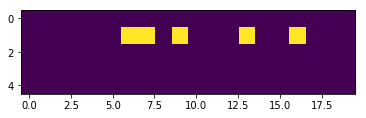

(5, 20, 1)


In [170]:
import matplotlib.pyplot as plt
iddd = 11
plt.imshow(small_data_input[iddd].reshape(5, 20))
plt.show()
print(small_data_input[iddd].shape)

In [171]:
X_train_small_np, X_test_small_np, y_train_small_np, y_test_small_np = train_test_split(
    small_data_input, small_target_input, test_size=0.3, random_state=randint(100, 10000))
X_train_train_small_np, X_vali_small_np, y_train_train_small_np, y_vali_small_np = train_test_split(
    X_train_small_np, y_train_small_np, test_size=0.3, random_state=randint(100, 10000))

In [177]:
from keras.utils import to_categorical
y_train_train_small_np = to_categorical(y_train_train_small_np)
y_vali_small_np = to_categorical(y_vali_small_np)
y_train_small_np = to_categorical(y_train_small_np)
y_test_small_np = to_categorical(y_test_small_np)

In [179]:
model_st = Sequential()
model_st.add(Conv2D(64, kernel_size=2, activation='relu', input_shape=(5,20,1)))
model_st.add(Flatten())
model_st.add(Dense(units=32, activation='relu'))
model_st.add(Dense(2, activation='softmax'))
model_st.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

model_st.fit(X_train_train_small_np, y_train_train_small_np,
                 validation_data=(X_vali_small_np, y_vali_small_np),
                 epochs=100, batch_size=2048, verbose=1)

Train on 17219 samples, validate on 7380 samples
Epoch 1/100
17219/17219 [==============================] - ETA: 3s - loss: 0.6948 - acc: 0.501 - ETA: 2s - loss: 0.6889 - acc: 0.544 - ETA: 1s - loss: 0.6861 - acc: 0.553 - ETA: 1s - loss: 0.6811 - acc: 0.566 - ETA: 0s - loss: 0.6790 - acc: 0.575 - ETA: 0s - loss: 0.6774 - acc: 0.581 - ETA: 0s - loss: 0.6759 - acc: 0.586 - ETA: 0s - loss: 0.6733 - acc: 0.590 - 2s 105us/step - loss: 0.6727 - acc: 0.5921 - val_loss: 0.6658 - val_acc: 0.6065
Epoch 2/100
17219/17219 [==============================] - ETA: 1s - loss: 0.6583 - acc: 0.612 - ETA: 1s - loss: 0.6555 - acc: 0.612 - ETA: 0s - loss: 0.6559 - acc: 0.616 - ETA: 0s - loss: 0.6571 - acc: 0.614 - ETA: 0s - loss: 0.6580 - acc: 0.611 - ETA: 0s - loss: 0.6563 - acc: 0.614 - ETA: 0s - loss: 0.6561 - acc: 0.614 - ETA: 0s - loss: 0.6566 - acc: 0.614 - 2s 92us/step - loss: 0.6556 - acc: 0.6172 - val_loss: 0.6603 - val_acc: 0.6111
Epoch 3/100
17219/17219 [==============================] - ETA: 1s

17219/17219 [==============================] - ETA: 1s - loss: 0.6009 - acc: 0.667 - ETA: 0s - loss: 0.6029 - acc: 0.662 - ETA: 0s - loss: 0.5995 - acc: 0.662 - ETA: 0s - loss: 0.5980 - acc: 0.664 - ETA: 0s - loss: 0.5984 - acc: 0.662 - ETA: 0s - loss: 0.5986 - acc: 0.661 - ETA: 0s - loss: 0.5989 - acc: 0.661 - ETA: 0s - loss: 0.5991 - acc: 0.661 - 1s 86us/step - loss: 0.5999 - acc: 0.6603 - val_loss: 0.6373 - val_acc: 0.6164
Epoch 20/100
17219/17219 [==============================] - ETA: 1s - loss: 0.5978 - acc: 0.664 - ETA: 1s - loss: 0.5970 - acc: 0.660 - ETA: 0s - loss: 0.5936 - acc: 0.663 - ETA: 0s - loss: 0.5936 - acc: 0.665 - ETA: 0s - loss: 0.5955 - acc: 0.663 - ETA: 0s - loss: 0.5955 - acc: 0.665 - ETA: 0s - loss: 0.5973 - acc: 0.661 - ETA: 0s - loss: 0.5980 - acc: 0.661 - 2s 89us/step - loss: 0.5983 - acc: 0.6616 - val_loss: 0.6381 - val_acc: 0.6182
Epoch 21/100
17219/17219 [==============================] - ETA: 1s - loss: 0.5743 - acc: 0.687 - ETA: 1s - loss: 0.5835 - acc:

17219/17219 [==============================] - ETA: 1s - loss: 0.5586 - acc: 0.691 - ETA: 1s - loss: 0.5548 - acc: 0.697 - ETA: 0s - loss: 0.5623 - acc: 0.690 - ETA: 0s - loss: 0.5616 - acc: 0.693 - ETA: 0s - loss: 0.5639 - acc: 0.690 - ETA: 0s - loss: 0.5627 - acc: 0.689 - ETA: 0s - loss: 0.5661 - acc: 0.686 - ETA: 0s - loss: 0.5672 - acc: 0.684 - 1s 86us/step - loss: 0.5672 - acc: 0.6846 - val_loss: 0.6545 - val_acc: 0.6034
Epoch 38/100
17219/17219 [==============================] - ETA: 1s - loss: 0.5525 - acc: 0.693 - ETA: 1s - loss: 0.5574 - acc: 0.689 - ETA: 0s - loss: 0.5587 - acc: 0.690 - ETA: 0s - loss: 0.5609 - acc: 0.690 - ETA: 0s - loss: 0.5633 - acc: 0.691 - ETA: 0s - loss: 0.5643 - acc: 0.689 - ETA: 0s - loss: 0.5657 - acc: 0.689 - ETA: 0s - loss: 0.5672 - acc: 0.688 - 1s 85us/step - loss: 0.5680 - acc: 0.6876 - val_loss: 0.6566 - val_acc: 0.6056
Epoch 39/100
17219/17219 [==============================] - ETA: 1s - loss: 0.5643 - acc: 0.694 - ETA: 0s - loss: 0.5617 - acc:

17219/17219 [==============================] - ETA: 1s - loss: 0.5587 - acc: 0.695 - ETA: 0s - loss: 0.5422 - acc: 0.709 - ETA: 0s - loss: 0.5442 - acc: 0.702 - ETA: 0s - loss: 0.5441 - acc: 0.703 - ETA: 0s - loss: 0.5451 - acc: 0.703 - ETA: 0s - loss: 0.5473 - acc: 0.703 - ETA: 0s - loss: 0.5477 - acc: 0.702 - ETA: 0s - loss: 0.5480 - acc: 0.702 - 1s 84us/step - loss: 0.5491 - acc: 0.7007 - val_loss: 0.6678 - val_acc: 0.5993
Epoch 56/100
17219/17219 [==============================] - ETA: 1s - loss: 0.5396 - acc: 0.707 - ETA: 0s - loss: 0.5434 - acc: 0.710 - ETA: 0s - loss: 0.5467 - acc: 0.703 - ETA: 0s - loss: 0.5448 - acc: 0.706 - ETA: 0s - loss: 0.5439 - acc: 0.709 - ETA: 0s - loss: 0.5478 - acc: 0.705 - ETA: 0s - loss: 0.5483 - acc: 0.704 - ETA: 0s - loss: 0.5506 - acc: 0.701 - 1s 85us/step - loss: 0.5498 - acc: 0.7021 - val_loss: 0.6696 - val_acc: 0.6041
Epoch 57/100
17219/17219 [==============================] - ETA: 1s - loss: 0.5600 - acc: 0.694 - ETA: 0s - loss: 0.5509 - acc:

17219/17219 [==============================] - ETA: 1s - loss: 0.5536 - acc: 0.700 - ETA: 0s - loss: 0.5441 - acc: 0.707 - ETA: 0s - loss: 0.5340 - acc: 0.716 - ETA: 0s - loss: 0.5307 - acc: 0.717 - ETA: 0s - loss: 0.5366 - acc: 0.710 - ETA: 0s - loss: 0.5381 - acc: 0.709 - ETA: 0s - loss: 0.5385 - acc: 0.709 - ETA: 0s - loss: 0.5385 - acc: 0.711 - 1s 83us/step - loss: 0.5393 - acc: 0.7106 - val_loss: 0.6913 - val_acc: 0.5908
Epoch 74/100
17219/17219 [==============================] - ETA: 1s - loss: 0.5361 - acc: 0.715 - ETA: 0s - loss: 0.5388 - acc: 0.712 - ETA: 0s - loss: 0.5389 - acc: 0.709 - ETA: 0s - loss: 0.5387 - acc: 0.709 - ETA: 0s - loss: 0.5397 - acc: 0.706 - ETA: 0s - loss: 0.5391 - acc: 0.708 - ETA: 0s - loss: 0.5406 - acc: 0.708 - ETA: 0s - loss: 0.5401 - acc: 0.709 - 1s 85us/step - loss: 0.5407 - acc: 0.7088 - val_loss: 0.6815 - val_acc: 0.6011
Epoch 75/100
17219/17219 [==============================] - ETA: 1s - loss: 0.5297 - acc: 0.720 - ETA: 0s - loss: 0.5312 - acc:

17219/17219 [==============================] - ETA: 1s - loss: 0.5365 - acc: 0.714 - ETA: 0s - loss: 0.5321 - acc: 0.713 - ETA: 0s - loss: 0.5252 - acc: 0.719 - ETA: 0s - loss: 0.5257 - acc: 0.721 - ETA: 0s - loss: 0.5281 - acc: 0.716 - ETA: 0s - loss: 0.5282 - acc: 0.716 - ETA: 0s - loss: 0.5281 - acc: 0.719 - ETA: 0s - loss: 0.5288 - acc: 0.717 - 2s 88us/step - loss: 0.5292 - acc: 0.7173 - val_loss: 0.6985 - val_acc: 0.5919
Epoch 92/100
17219/17219 [==============================] - ETA: 1s - loss: 0.5209 - acc: 0.724 - ETA: 1s - loss: 0.5202 - acc: 0.728 - ETA: 0s - loss: 0.5233 - acc: 0.722 - ETA: 0s - loss: 0.5273 - acc: 0.718 - ETA: 0s - loss: 0.5296 - acc: 0.718 - ETA: 0s - loss: 0.5292 - acc: 0.717 - ETA: 0s - loss: 0.5283 - acc: 0.718 - ETA: 0s - loss: 0.5281 - acc: 0.718 - 2s 89us/step - loss: 0.5288 - acc: 0.7182 - val_loss: 0.6976 - val_acc: 0.6026
Epoch 93/100
17219/17219 [==============================] - ETA: 1s - loss: 0.5237 - acc: 0.722 - ETA: 1s - loss: 0.5370 - acc: